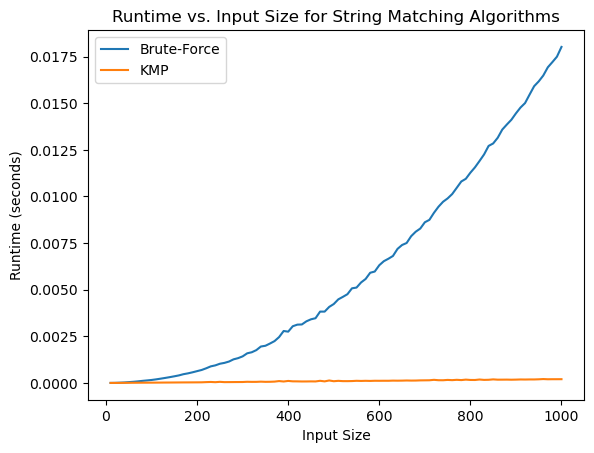

In [1]:
import time
import matplotlib.pyplot as plt

# Brute-Force (BF) 算法
def brute_force_search(text, pattern):
    n = len(text)
    m = len(pattern)
    occurrences = 0

    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            j += 1
        if j == m:
            occurrences += 1

    return occurrences

# KMP算法
def compute_lps_array(pattern):
    m = len(pattern)
    lps = [0] * m
    j = 0

    for i in range(1, m):
        while j > 0 and pattern[i] != pattern[j]:
            j = lps[j - 1]

        if pattern[i] == pattern[j]:
            j += 1
        lps[i] = j
    return lps

def kmp_search(text, pattern):
    n = len(text)
    m = len(pattern)
    lps = compute_lps_array(pattern)
    occurrences = 0

    j = 0
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = lps[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            occurrences += 1
            j = lps[j - 1]

    return occurrences

# 用法示例
input_sizes = list(range(10, 1001, 10))  # 不同输入规模
bf_runtimes = []
kmp_runtimes = []

for size in input_sizes:
    text = "A" * size
    pattern = "A" * (size // 2)

    start_time = time.time()
    brute_force_search(text, pattern)
    end_time = time.time()
    bf_runtimes.append(end_time - start_time)

    start_time = time.time()
    kmp_search(text, pattern)
    end_time = time.time()
    kmp_runtimes.append(end_time - start_time)

plt.plot(input_sizes, bf_runtimes, label="Brute-Force")
plt.plot(input_sizes, kmp_runtimes, label="KMP")
plt.xlabel("Input Size")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.title("Runtime vs. Input Size for String Matching Algorithms")
plt.show()
